In [1]:
import matplotlib.pyplot as plt; 
import numpy as np; 
import csv;
import os; 

In [2]:
ethnicity_list = ["All races", "White", "Black", \
                  "Other (American Indian/AK Nativ",  \
                  "Other unspecified (1978-1991)"]

cancer_types_list = ["Breast", "Prostate", "Lung and Bronchus"]

SEER_Stat_files = ["CDC_Morbidity"]

In [3]:
# Make tables of CDC data for each cancer type, for each data type
def parse_data_CDC(file, cancer_type, gender_type, ethnicity_list):
    
    # Build filename to look in the Data archive
    filename = os.path.join("Data", "SEER_Stat", file + ".csv")
    
    data = []; x = []; 
    # Open CDC files and read in all lines
    f = open(filename,'r')
    for line in f: data.append(line)
    f.close() 
    
    # Parse data into variables
    for i in range(6): x.append(0)
    
    # Build lists for each 
    year = []; all_races = []; white = []; black = []; asian = []; unspecified = []; 
    for i in range(len(data)):
        x = data[i].split(",")    
        if x[0] == cancer_type:
            if x[2] == gender_type:
                
                # Remove parentheses from "Other ...
                check_ethnicity = list(x[3]); 
                if (check_ethnicity[-1] == "e" and check_ethnicity[-2] == "v"):
                    x[3] = "".join(check_ethnicity[1:-1])               
                
                if x[1] != "1969-2015": 
                    x[1] = int(x[1]); x[-1] = int(x[-1])
                    if x[3] == ethnicity_list[0]: all_races.append(x[-1]); year.append(x[1])
                    if x[3] == ethnicity_list[1]: white.append(x[-1])
                    if x[3] == ethnicity_list[2]: black.append(x[-1])
                    if x[3] == ethnicity_list[3]: asian.append(x[-1])    
                    if x[3] == ethnicity_list[4]: unspecified.append(x[-1])
                    
    # Build table of all percentages
    table = np.array([year, white, black, asian, unspecified])
    table = np.transpose(table)
    filename = os.path.join("Tables", cancer_type + " " + gender_type + ".csv")
    
    scatter_plot(year, white, black, asian, unspecified, cancer_type )
        
    return(year, white, black, asian, unspecified)
    

In [4]:
# Make tables of CDC data for each cancer type, for each data type
def scatter_plot(year, white, black, asian, unspecified, cancer_type):
    
    plt.scatter(year,white, label = "Caucasian")
    plt.scatter(year,black, label = "African American")
    plt.scatter(year,asian, label = "Asian and Native American")
    plt.scatter(year,unspecified, label = "Unspecified")
    plt.title(cancer_type + " Cancer Morbidity")
    plt.legend(loc='upper left')
    plt.show()
    

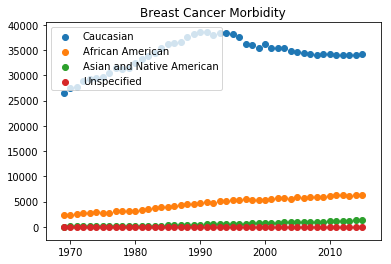

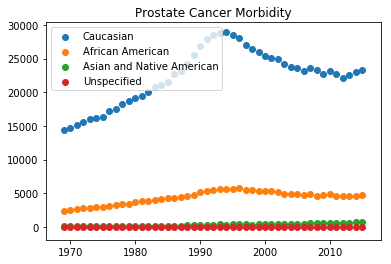

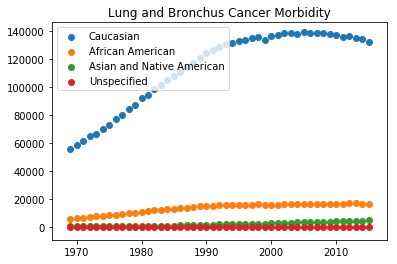

In [5]:


for i in range(len(cancer_types_list)):
    year, white, black, asian, unspecified = \
    parse_data_CDC(SEER_Stat_files[0], cancer_types_list[i], \
                   "Male and female", ethnicity_list)
